### **Transformasi Fourier**

Saving Kiyosaki-9.jpg to Kiyosaki-9 (2).jpg
Citra berhasil dibaca!


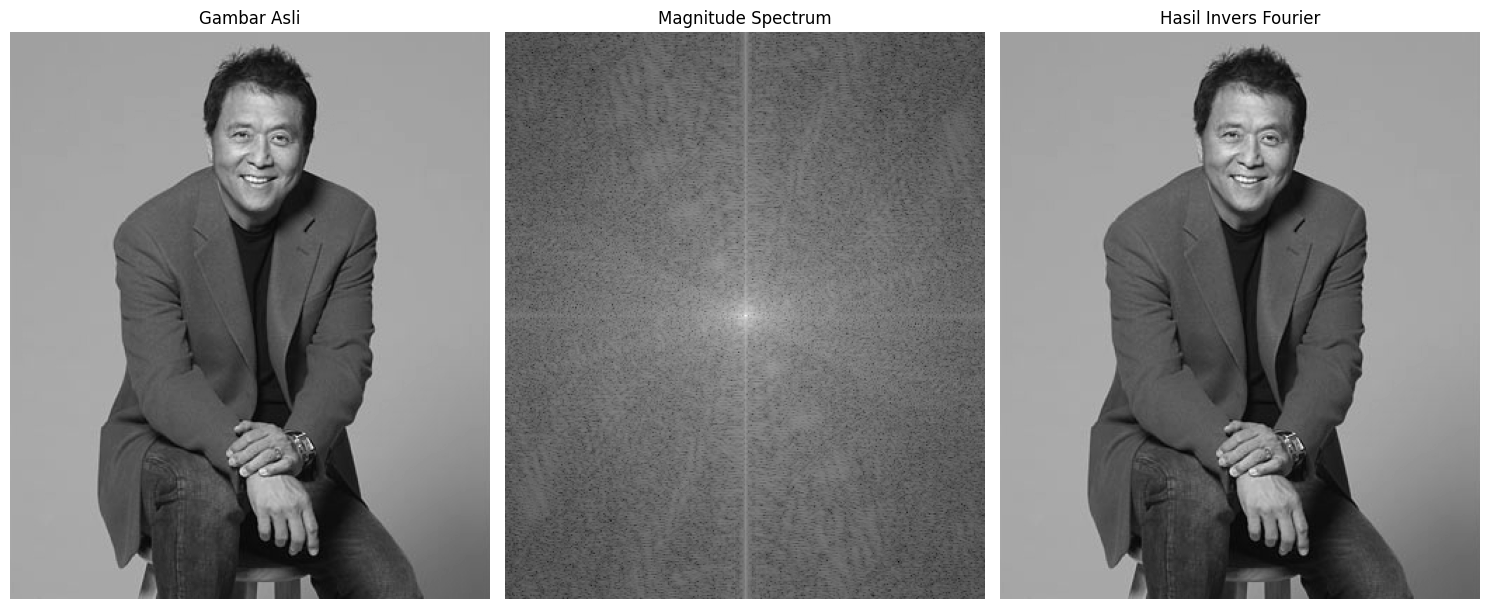

In [3]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload file gambar
uploaded = files.upload()

# Membaca citra grayscale
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Memastikan citra berhasil dibaca
if image is None:
    print("Citra tidak ditemukan. Pastikan file citra tersedia!")
else:
    print("Citra berhasil dibaca!")

# Transformasi Fourier
# Menggunakan fungsi dft untuk melakukan transformasi Fourier
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Memindahkan frekuensi nol ke tengah

# Menghitung Magnitude Spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Inverse Fourier Transform
dft_ishift = np.fft.ifftshift(dft_shift)  # Memindahkan kembali ke domain frekuensi asli
image_reconstructed = cv2.idft(dft_ishift)  # Inverse transform
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

# Visualisasi
plt.figure(figsize=(15, 10))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Gambar Hasil Invers Fourier
plt.subplot(1, 3, 3)
plt.title("Hasil Invers Fourier")
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Langkah-Langkah Implementasi**
1. Import Library:

    cv2: Untuk membaca gambar dan melakukan operasi pada citra. numpy: Untuk perhitungan matriks, termasuk Transformasi Fourier. matplotlib.pyplot: Untuk visualisasi.

2. Mengunggah dan Membaca Gambar:

    Gambar diunggah menggunakan files.upload() dan dibaca dalam format grayscale (cv2.IMREAD_GRAYSCALE).

3. Transformasi Fourier:

    cv2.dft() digunakan untuk menghitung Transformasi Fourier Diskrit (DFT) pada citra. np.fft.fftshift() digunakan untuk memindahkan komponen frekuensi rendah (di pusat citra) ke tengah spektrum, sehingga lebih mudah dianalisis.

4. Magnitude Spectrum:

    Menggunakan fungsi cv2.magnitude() untuk menghitung besar frekuensi dari Transformasi Fourier. Skala logaritmik (20 * np.log) digunakan untuk meningkatkan keterbacaan spektrum, karena nilai frekuensi dapat sangat bervariasi.

5. Inverse Fourier Transform:

    np.fft.ifftshift() memindahkan kembali frekuensi ke domain asli. cv2.idft() menghitung invers transformasi untuk merekonstruksi kembali gambar ke domain spasial.

6. Visualisasi:

    Gambar asli, magnitude spectrum, dan hasil invers Fourier ditampilkan menggunakan plt.imshow().